<a href="https://colab.research.google.com/github/arfanrifqi/youtubeAPI/blob/main/youtube_analysis_kasisoulsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#update 15 jul 2022

In [ ]:
pip install isodate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from googleapiclient.discovery import build
from dateutil import parser
import isodate
import numpy as np
import string
from collections import Counter

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from PIL import Image

# NLP
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
pd.set_option("display.max_colwidth", 1000)

In [ ]:
#%matplotlib inline
#sns.set_style("whitegrid")
#sns.color_palette("dark")
#plt.style.use("fivethirtyeight")

In [ ]:
api_key='....'
channel_ids ='UC5rEjJFYx03lhODA9uH9zew'

youtube=build('youtube','v3',developerKey=api_key)

# detail channel

In [ ]:
def get_channel_stats(youtube, channel_ids):
    channels = []
##request data    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=channel_ids)
    
    response = request.execute()
#loop for items from response 
    
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'Channelpublished':item['snippet']['publishedAt'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']}
        channels.append(data)
        
    return(channels)

In [ ]:
ax=get_channel_stats(youtube, channel_ids)
print('Detail Channel kasisolusi :\n',ax)

Detail Channel kasisolusi :
 [{'channelName': 'kasisolusi', 'subscribers': '254000', 'views': '14857672', 'totalVideos': '225', 'Channelpublished': '2021-08-06T06:24:47.1103Z', 'playlistId': 'UU5rEjJFYx03lhODA9uH9zew'}]


In [ ]:
playlistId='UU5rEjJFYx03lhODA9uH9zew'

In [ ]:
def get_all_id(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    all_id = []
    
    for i in range(len(response['items'])):
        all_id.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                all_id.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return all_id

In [ ]:
vid_ids=(get_all_id(youtube, playlistId))
len(vid_ids)

225

In [ ]:
def get_video_details(youtube, vid_ids):

    all_video_info = []
    
    for i in range(0, len(vid_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(vid_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            keep= {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for i in keep.keys():
                for v in keep[i]:
                    try:
                        video_info[v] = video[i][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)

In [ ]:
df_yt=get_video_details(youtube, vid_ids)

In [ ]:
df_yt.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,z-lWFu-XE1s,kasisolusi,BURUAN CONTEK RUMUS INI! 2 TIPS MEMBUAT NAMA MEREK AGAR CEPAT DIKENAL & SELALU DIINGAT - Pak Bi,"🗣 @Subiakto Official \nPak Subiakto Priosoedarsono atau biasa dipanggil Pak Bi, merupakan Seorang Praktisi Branding yang Sudah Berkiprah Selama Lebih Dari 50 Tahun.\nKali ini beliau, akan bongkar habis rumus penting membuat nama merk agar cepat dikenal & selalu diingat orang!\n\nKabar baiknya, Pak Subiakto sedang buka Workshop yang akan ajari kamu agar cepa bisa bikin brand yang mudah diingat orang.\nGimana cara daftarnya ? Kunjungi link dibawah ini\nhttps://bit.ly/bmspakbi\natau kunjungi link di bio @kasisolusi ya!\n\nSimak sampai habis videonya ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​",None,2022-07-15T15:47:43Z,14501,512,None,60,PT49M26S,hd,false
1,kBNuP3-1a-0,kasisolusi,"CARA EKSPOR PRODUK USAHAMU GO INTERNASIONAL, MESKIPUN KAMU ANAK MUDA/LANSIA - Exportir Oil Essential",🗣️ Pak Agung Purwo Susilo\nBeliau merupakan Exportir Oil Essential atau Biang Parfum. Kali ini beliau akan ajarin step by step cara gampang agar produk usahamu bisa ekspor ke Mancanegara. Orang ini pun Alumni @exportacademy.idn yang disana Pak Agung belajar Ekspor dari nol sehingga bisa sesukses sekarang.\n\nKamu pun akan diajarin bagaimana agar Jago Expor Produkmu dan dapat omset miliaran rupiah hanya dalam waktu singkat.\nDiajarin sama expert dibidangnya yaitu @exportacademy.idn\n\nGimana cara daftarnya ? Klik link di bio akun Instagram @kasisolusi ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​,None,2022-07-14T14:10:44Z,7776,220,None,21,PT54M33S,hd,false
2,l_gieg-xDEo,kasisolusi,OMSET MELEDAK! BONGKAR STRATEGI MINUMAN KEKINIAN YANG CAPAI PULUHAN MILIAR PER TAHUN - Founder Glek,"🗣️Founder @glek.id\n\nPak Mahdi @aresdimahdi, beliau merupakan founder @glek.id. Kali ini beliau akan buka-bukaan bagaimana strategi minuman kekinian yang capai puluhan miliar per tahun\nSimak videonya sampai habis ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​",None,2022-07-13T15:39:15Z,18028,608,None,125,PT1H19M2S,hd,false
3,dR4eUtV3xAY,kasisolusi,"CARA BIKIN KONTEN SOCIAL MEDIA UNTUK BISNIS SKINCARE, TANPA UMBAR AURAT PEREMPUAN - Founder SBCSkin","🗣️Founder @Sbcskin Official \nPak Faris, beliau merupakan founder @Sbcskin Official . Kali ini beliau akan bongkar bagaimana cara bikin konten social media untuk bisnis skincare, tanpa umbar aurat perempuan\n\nSimak videonya sampai habis ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​",None,2022-07-12T13:08:19Z,16192,441,None,49,PT56M15S,hd,false
4,AA6WX2bIYyc,kasisolusi,"CARA AMPUH BIKIN USAHA ""FRIED CHICKEN"" MESKIPUN GAPTEK DIGITAL, KHUSUS PEMULA - CEO Dkriuk","🗣️CEO of @Dkriuk Fried Chicken \n\nPak Ikhsan, beliau merupakan CEO @Dkriuk Fried Chicken . Kali ini beliau akan bongkar cara ampuh bikin usaha ""Fried Chicken"" meskipun gaptek digital, khusus pemula. Menariknya, @Dkriuk Fried Chicken bisa jual lebih dari 4 juta porsi setiap bulannya! Maa Syaa Allah, mau tau gimana caranya ?\nSimak videonya sampai habis ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​",None,2022-07-11T12:31:06Z,29042,719,None,150,PT45M6S,hd,false


# data wrangling

In [ ]:
#convert 
df_yt['viewCount']=pd.to_numeric(df_yt['viewCount'])
df_yt['publishedAt']=pd.to_datetime(df_yt['publishedAt'])

In [ ]:
#add durationsecond for calculation
df_yt['durationSecs'] = df_yt['duration'].apply(lambda x: isodate.parse_duration(x))
df_yt['durationSecs'] = df_yt['durationSecs'].astype('timedelta64[s]')

In [ ]:
#add number of tags
df_yt['tagsCount'] = df_yt['tags'].apply(lambda x: 0 if x is None else len(x))

# EDA

## most view

In [ ]:
#first video

pbm=df_yt.publishedAt.min()
df_yt.loc[df_yt.publishedAt == pbm]

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,tagsCount
224,ZUSzei4fGIc,kasisolusi,"CARA MENAIKKAN OMSET, SETELAH MELAKUKAN PROMO - Reinat Fuad [PART 1]","Pada video kali ini kasisolusi kedatangan tamu, yaitu Reinat Fuad yang merupakan founder dari PT Lezzetli Semesta Rasa dan PT Lezzetli Renerfindo Multirasa yang bergerak dibidang kuliner.\n\nDivideo kali ini akan dibongkar kenapa para pemula di dunia digital marketing sering terjebak dengan anggapan bahwa kalau promo di sosial media , marketplace merasa sudah cukup untuk menaikkan omset mereka. Ketika omset tidak kunjung naik mereka baru mencari salahnya dimana.\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​","[cara menaikkan omset, bisnis online omset milyaran, bisnis online omset puluhan juta, bisnis online omset ratusan juta, bisnis online pemula, bisnis online sukses, bisnis online aplikasi, bisnis online di instagram]",2021-08-19 10:35:35+00:00,9858,290,None,13,PT6M35S,hd,false,395.0,8


## video statistic

In [ ]:
avg_view=df_yt.viewCount.mean()
max_view=df_yt.viewCount.max()
min_view=df_yt.viewCount.min()
print('Rata-rata views yang di dapat dari seluruh video :','%d'%(avg_view))
print('views terbanyak:',max_view)
print('view terendah:',min_view)

Rata-rata views yang di dapat dari seluruh video : 66252
views terbanyak: 1355626
view terendah: 3753


In [ ]:
#most video
df_yt.loc[df_yt.viewCount== max_view]

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs,tagsCount
99,9cU-YRVLMCY,kasisolusi,LAMA TAK TERDENGAR! AKTOR TERNAMA INI BONGKAR KISAH TAUBATNYA YANG MENGERIKAN - Andhika Gumilang,"🗣 : @dhika_gumilang88\n\nAndhika Gumilang, merupakan Mantan Aktor Ternama, yang dulunya terkenal dengan Iklan ""Mana Ekspresinya?!""\nLama tidak terdengar, kali ini beliau akan bongkar kisah taubatnya yang mengerikan.\n\nSimak sampai habis videonya ya!\n\nJangan lupa subscribe dan nyalain loncengnya! GRATIS!\n\nKasisolusi\n\nWadah solusi berbisnis bagi para pengusaha muslim\n\nInstagram : https://www.instagram.com/kasisolusi/​​",None,2022-03-04 15:37:14+00:00,1355626,32535,None,3102,PT1H3M14S,hd,false,3794.0,0


In [ ]:
df_yt['Monthpublished']=df_yt['publishedAt'].dt.strftime("%Y-%m") #add columns month 
vm=df_yt.groupby(['Monthpublished'])['viewCount'].sum().reset_index()
vm

,Monthpublished,viewCount
0,2021-08,135567
1,2021-09,112527
2,2021-10,552773
3,2021-11,1219209
4,2021-12,3356019
5,2022-01,1027987
6,2022-02,832398
7,2022-03,3161268
8,2022-04,1683529
9,2022-05,875852


In [ ]:
#Calculation
mxv=vm['viewCount'].max()
ma=vm['viewCount'].mean()
mn=vm['viewCount'].min()

print ('views terbanyak dalam satu bulan yaitu :',mxv,'views'
      '\nviews rata rata dalam satu bulan yiatu :','%d'%(ma),'views'
      '\nviews terendah dalam satu bula yaitu :',mn,'views')

views terbanyak dalam satu bulan yaitu : 3356019 views
views rata rata dalam satu bulan yiatu : 1242227 views
views terendah dalam satu bula yaitu : 112527 views


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


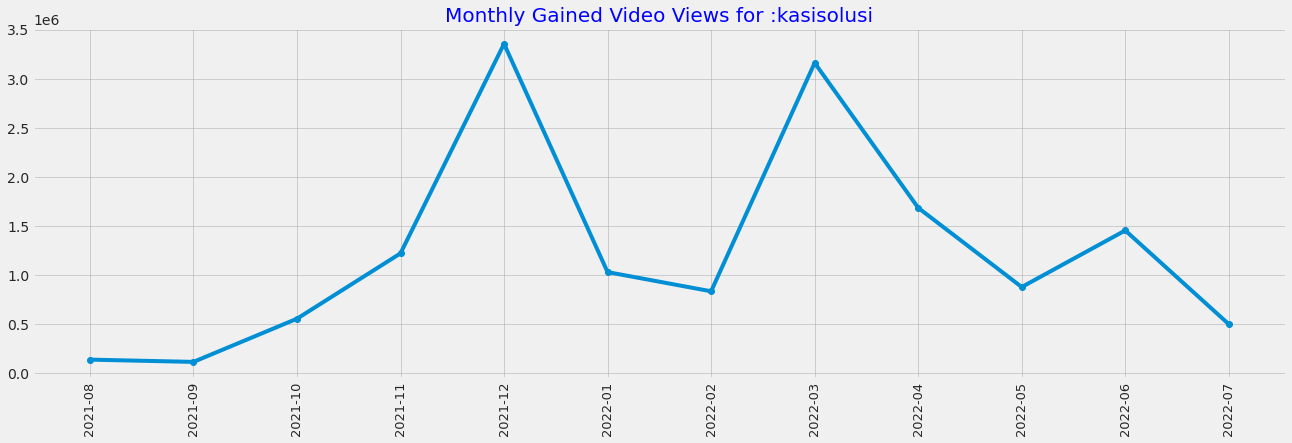

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Monthly Gained Video Views for :kasisolusi',loc='center',fontsize=20,color='blue')
plt.plot(vm['Monthpublished'],vm['viewCount'],marker='o')
plt.xticks(rotation='vertical',size=8)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='y')
plt.xticks(fontsize=13)
ax=plt.axes()
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000000) + 'juta'))

##Analyze the number of video

In [ ]:
numVid=df_yt.groupby(['Monthpublished'])['title'].count().reset_index()
numVid

,Monthpublished,title
0,2021-08,7
1,2021-09,10
2,2021-10,12
3,2021-11,17
4,2021-12,26
5,2022-01,29
6,2022-02,22
7,2022-03,17
8,2022-04,25
9,2022-05,21


In [ ]:
mx=numVid.title.max()
mxd=numVid.loc[numVid.title== mx]
print('Video terbanyak dalam satu bulan :',mx,'\n\nDetail nya :\n',mxd)

Video terbanyak dalam satu bulan : 29 

Detail nya :
   Monthpublished  title
5        2022-01     29


Text(0, 0.5, 'Number of video')

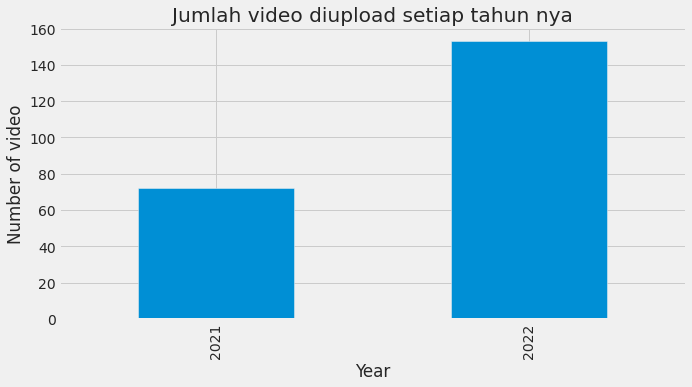

In [ ]:
df_yt['Year']=df_yt['publishedAt'].apply(lambda x: x.strftime("%Y"))
plt.figure(figsize=(10,5))
df_yt.groupby(['Year'])['Year'].count().plot.bar()
plt.title('Jumlah video diupload setiap tahun nya')
plt.ylabel('Number of video')

In [ ]:
#add column day 
df_yt['Day']=df_yt['publishedAt'].apply(lambda x: x.strftime("%A"))

Text(0, 0.5, 'number of videos')

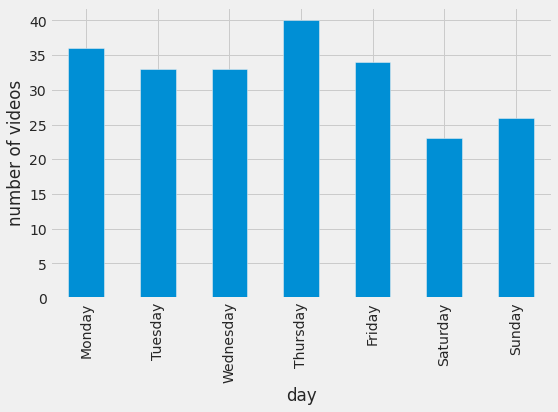

In [ ]:
#Jumlah video diupload di masing masing hari
day_df = pd.DataFrame(df_yt['Day'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='Day', rot=90,figsize =(8, 5))
ax.get_legend().remove()
plt.xlabel('day')
plt.ylabel('number of videos')

## most video channel

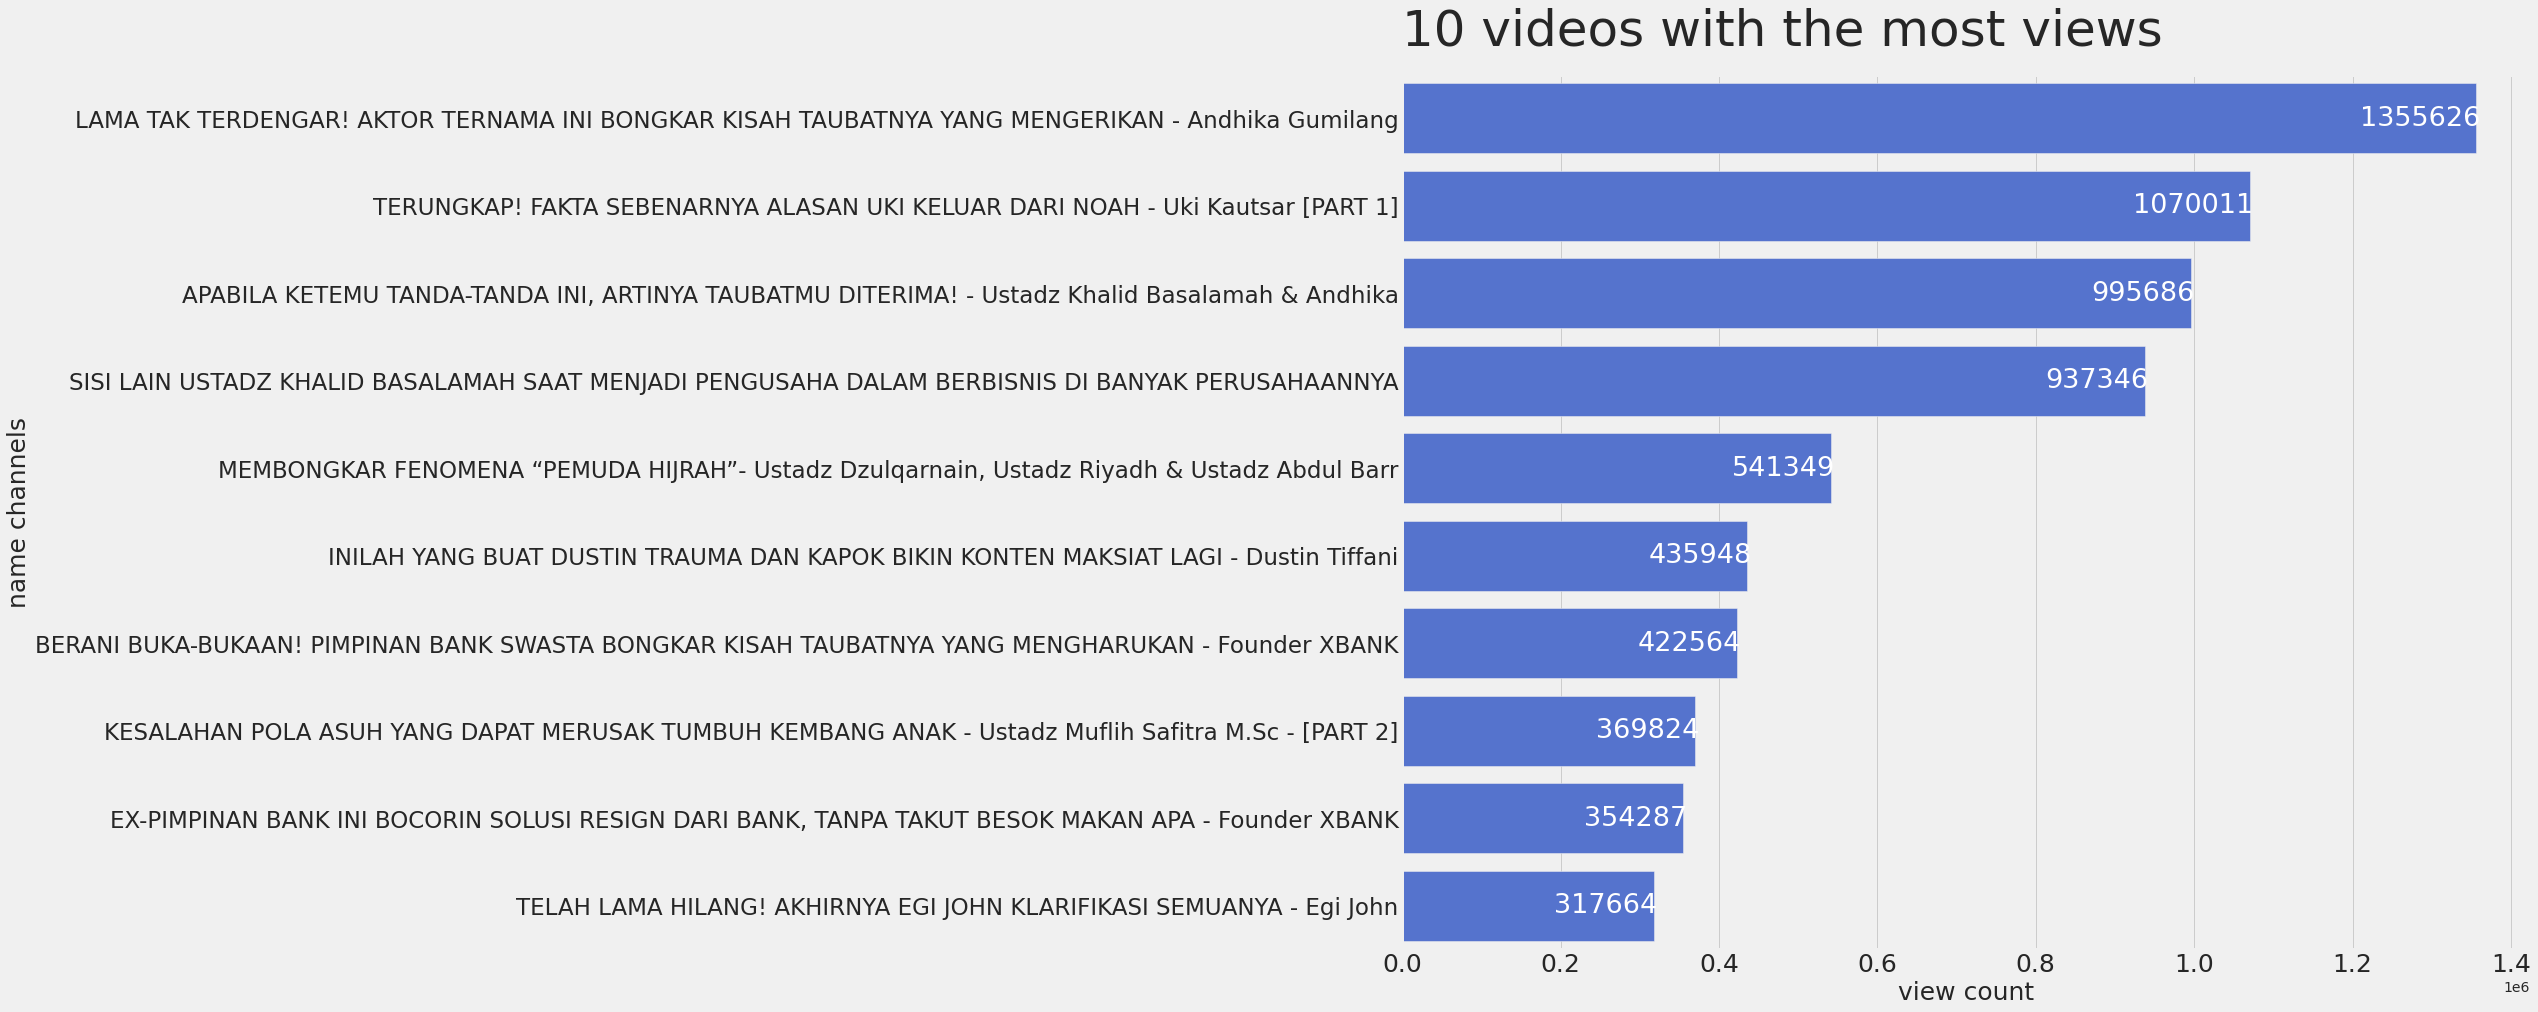

In [ ]:
fig, ax = plt.subplots(figsize=(18, 15))
data = df_yt.sort_values(['viewCount'], ascending=False)[:10]

sns.barplot(x='viewCount',
            y='title',
            data=data,
            estimator = sum,
            ci = None, color='royalblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(4, 0), textcoords='offset points', ha="right", va="center" ,color='white',fontsize=27)
plt.xticks(fontsize=25)
plt.yticks(fontsize=23)
plt.title('10 videos with the most views', fontsize=50, loc='left', pad=30)
plt.xlabel('view count', fontsize=25)
plt.ylabel('name channels', fontsize=25)
plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='x')
plt.show()

## lowest video

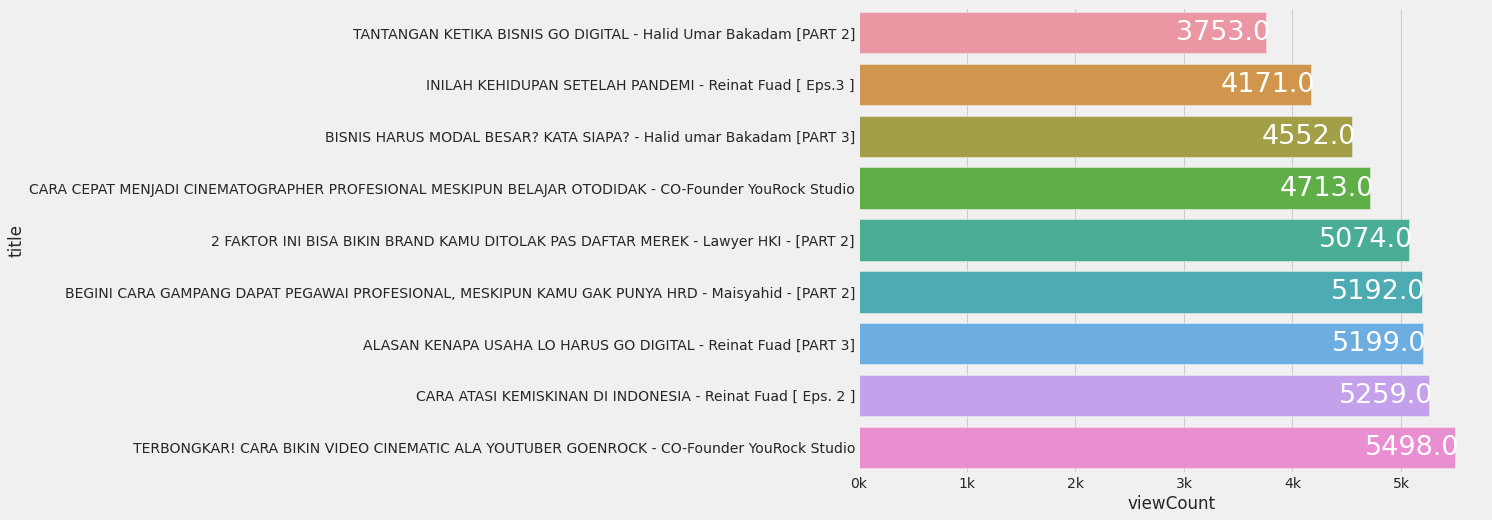

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'viewCount', y = 'title', data = df_yt.sort_values('viewCount', ascending=True)[0:9])
for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(4,0), textcoords='offset points', ha="right", va="center" ,color='white',fontsize=27)
plot = ax.set_xticklabels(ax.get_xticklabels())
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'k'))

## number of views by video duration

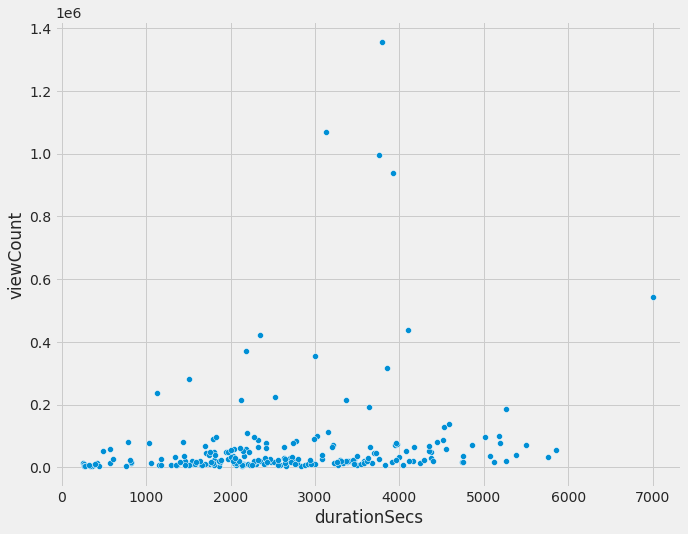

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_yt, x = "durationSecs", y = "viewCount")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black

ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
ax.spines['top'].set_color('white') 

#plt.xlabel(colors='white')
#plt.ylabel(color='white')
#plt.xticks(color='white')
#plt.yticks(color='white')

In [ ]:
#df_yt.head()

In [ ]:
#df_load = pd.DataFrame(df_yt)

In [ ]:
#df_load.to_csv('/content/gdrive/MyDrive/dataset/youtubeAPI/kasisolusi_data.csv', index = False)